In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize':(15,10)})

In [3]:
dataset=pd.read_csv('house_data_prepared')
dataset.drop('Unnamed: 0',axis=1,inplace=True)
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,Total_power_consumed
0,2010-02-19,12:55:00,0.332,0.074,241.44,1.4,0.0,1.0,0.0,2010,2,19,1.0
1,2008-09-20,01:19:00,0.624,0.128,242.91,2.6,0.0,0.0,0.0,2008,9,20,0.0
2,2007-02-28,13:28:00,0.214,0.000,240.92,0.8,0.0,0.0,0.0,2007,2,28,0.0
3,2010-10-27,00:27:00,0.876,0.238,246.75,3.6,0.0,0.0,1.0,2010,10,27,1.0
4,2007-07-14,14:50:00,0.638,0.198,244.19,3.4,2.0,1.0,0.0,2007,7,14,3.0


### Basic Profile Report

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39471 entries, 0 to 39470
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   39471 non-null  object 
 1   Time                   39471 non-null  object 
 2   Global_active_power    39471 non-null  float64
 3   Global_reactive_power  39471 non-null  float64
 4   Voltage                39471 non-null  float64
 5   Global_intensity       39471 non-null  float64
 6   Sub_metering_1         39471 non-null  float64
 7   Sub_metering_2         39471 non-null  float64
 8   Sub_metering_3         39471 non-null  float64
 9   year                   39471 non-null  int64  
 10  month                  39471 non-null  int64  
 11  day                    39471 non-null  int64  
 12  Total_power_consumed   39471 non-null  float64
dtypes: float64(8), int64(3), object(2)
memory usage: 3.9+ MB


In [5]:
dataset.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'year', 'month', 'day', 'Total_power_consumed'],
      dtype='object')

#### Cheking for null values

In [6]:
dataset.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
day                      0
Total_power_consumed     0
dtype: int64

In [7]:
dataset.duplicated().sum()

0

<AxesSubplot:>

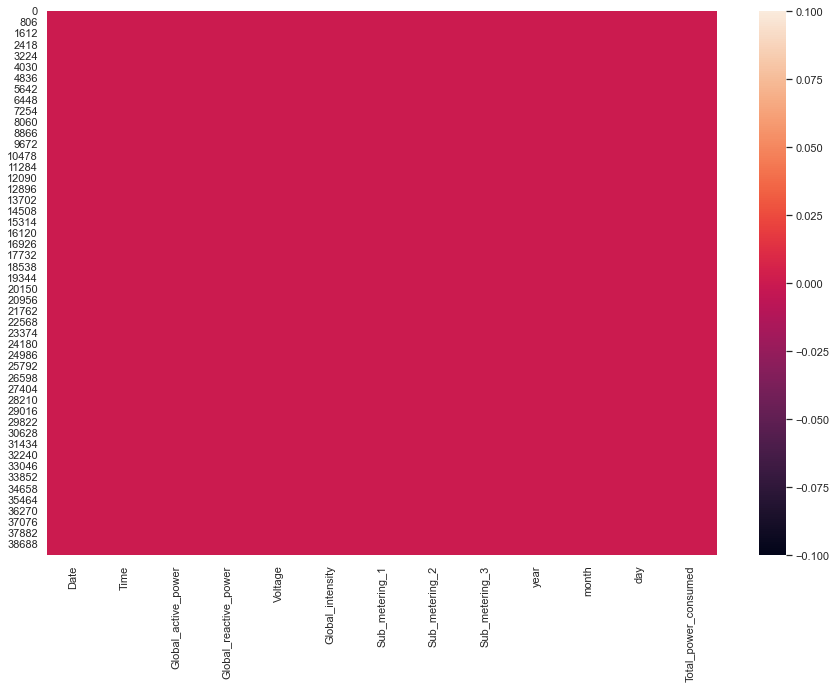

In [8]:
sns.heatmap(dataset.isnull())

#### Observation
- No null values in the dataset

##### Seperating continous and datetime features

In [9]:
continuous_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O' and dataset[feature].dtype!='int64']
continuous_features

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'Total_power_consumed']

In [10]:
### We have date time features

datatime_features=['year','month','day']
datatime_features

['year', 'month', 'day']

### Univariate analysis

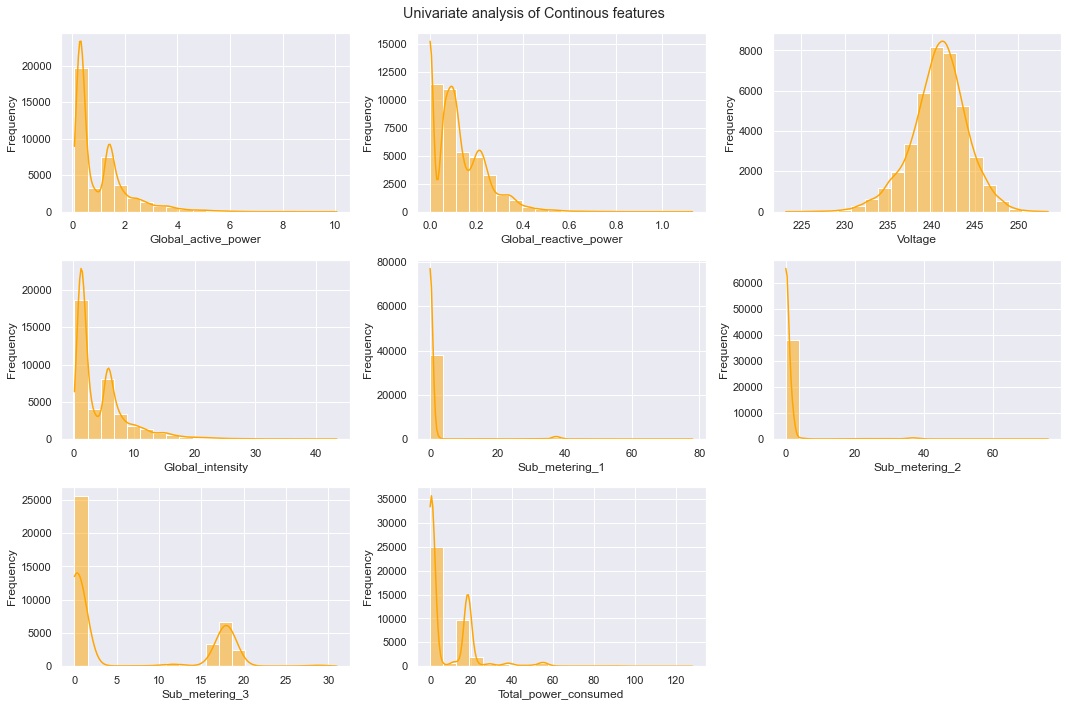

In [11]:
i=1
plt.suptitle('Univariate analysis of Continous features')
for feature in continuous_features:
    plt.subplot(3,3,i)
    i+=1
    sns.histplot(dataset[feature],kde=True,color='orange',bins=20)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()

#### Bivariate Analysis with target feature

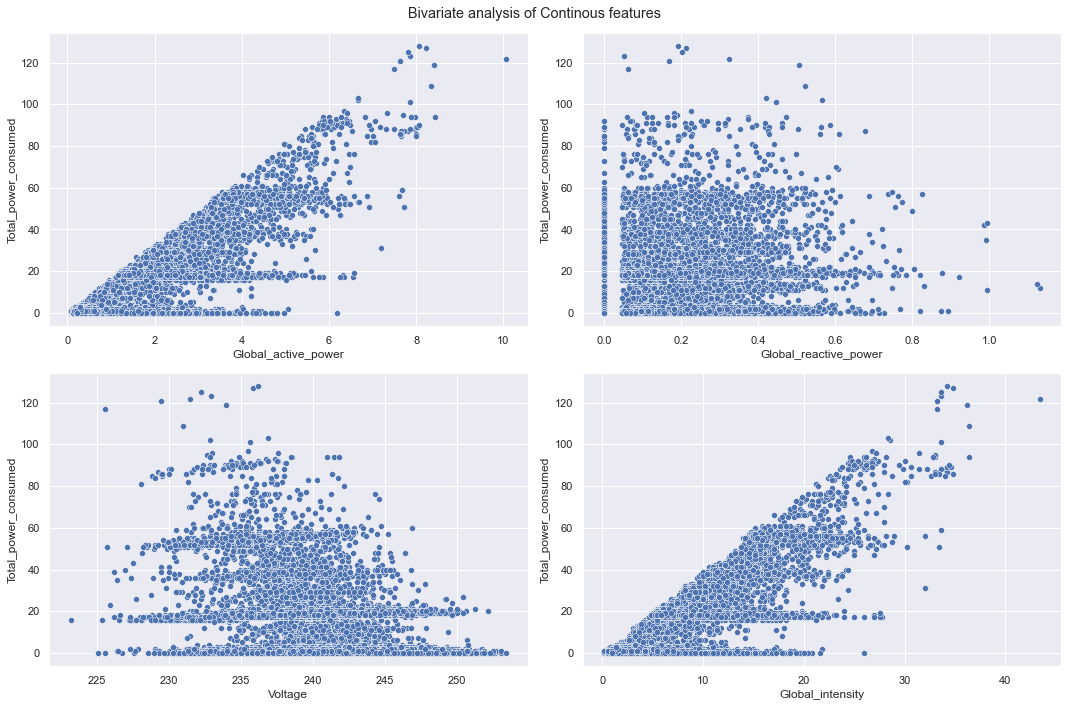

In [12]:
i=1
plt.suptitle('Bivariate analysis of Continous features')
for feature in ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity']:
    plt.subplot(2,2,i)
    i+=1
    sns.scatterplot(dataset[feature],dataset['Total_power_consumed'])
    plt.xlabel(feature)
    plt.ylabel('Total_power_consumed')
    plt.tight_layout()
    
    

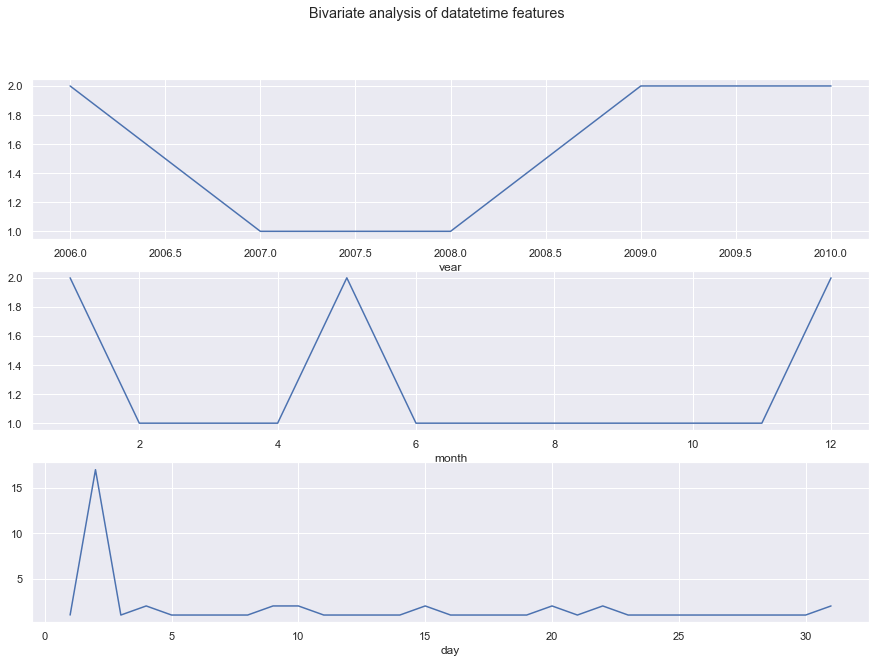

In [13]:
### Analysisg with year feature
i=1
plt.suptitle('Bivariate analysis of datatetime features')
for feature in datatime_features:
    plt.subplot(3,1,i)
    i+=1
    dataset.groupby(feature)['Total_power_consumed'].median().plot()

<AxesSubplot:>

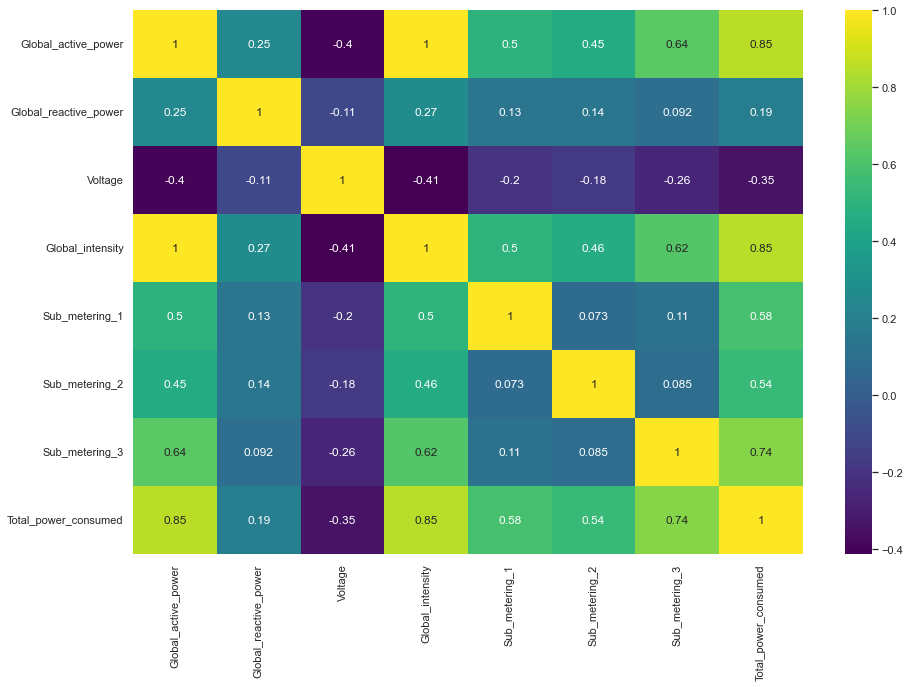

In [14]:
sns.heatmap(dataset[continuous_features].corr(),annot=True,cmap='viridis')

#### Observation
    - Global_active_power and Global_intensity these are highly positively correlated and both features are 85 % correlated with target feature

### Checking for Outliers 

<AxesSubplot:>

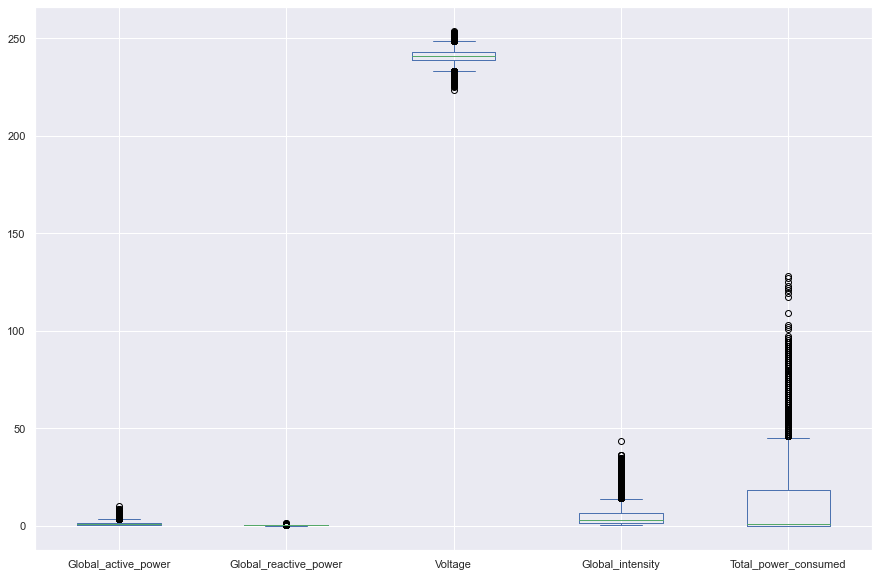

In [15]:
dataset[['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity','Total_power_consumed']].plot.box()

- There are many outliers in the data we need to handle them